In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import IPython.display as ipyd
import numpy as np
import math
ipyd.clear_output(wait=False)

Функция ```E(R)``` вычисляет напряженность гравитационного поля на расстоянии $R$ от центра Земли.

Если R больше или равно радиусу Земли $(R_{Earth})$, то используется формула для гравитационного поля вне Земли $\Big(G\frac{M_G}{R^2}\Big)$, где $G$ - гравитационная постоянная, $M_G$ - масса Земли, $R$ - расстояние от центра Земли.

Если $R$ меньше радиуса Земли, то используется функция ```poly_g(R / 1000)```, которая вычисляет напряженность гравитационного поля внутри Земли, используя модель PREM (Preliminary Reference Earth Model). Эта модель учитывает изменение плотности Земли с глубиной. Значение $R$ делится на 1000, чтобы перевести его из метров в километры, так как модель PREM использует километры в качестве единиц измерения расстояния.

PREM (Preliminary Reference Earth Model) - стандартная модель Земли, которая учитывает изменение плотности Земли с глубиной.

Функция ```np.where``` используется для выбора между двумя различными формулами в зависимости от значения радиуса $R$.

Если $R$ меньше или равно 3470 км (радиус ядра Земли), то используется первая формула, которая представляет собой квадратичную функцию от $R$.

Если $R$ больше 3470 км, то используется вторая формула, которая представляет собой полином пятого порядка от $R$.

In [ ]:
# Константы
G = 6.67428e-11    # Гравитационная постоянная
M = 5.9742e+24     # Масса земли, Кг
p_avg = 5510       # Средняя плотность земли, Кг/м^3
R_Earth = 6371000  # Радиус земли, м

# Функция для рассчета напряженности гравитационного поля
def poly_g(R):
    # Напряжённость (g) по модели PREM
    result = np.where(R <= 3470, -1.942e-2 + 3.853e-3 * R - 2.22e-7 * (R ** 2),
                      16.82 + 3.114e-3 * R - 4.059e-6 * (R ** 2) + 1.149e-9 * (R ** 3)
                      - 1.278e-13 * (R ** 4) + 4.894e-18 * (R ** 5))
    return result

# Функция для рассчета напряженности на расстоянии R
def E(R):
    if R >= R_Earth:
        return G * M / (R ** 2)
    else:
        return poly_g(R / 1000)

# Векторизованные функции для массивов R
vectorized_E = np.vectorize(E)

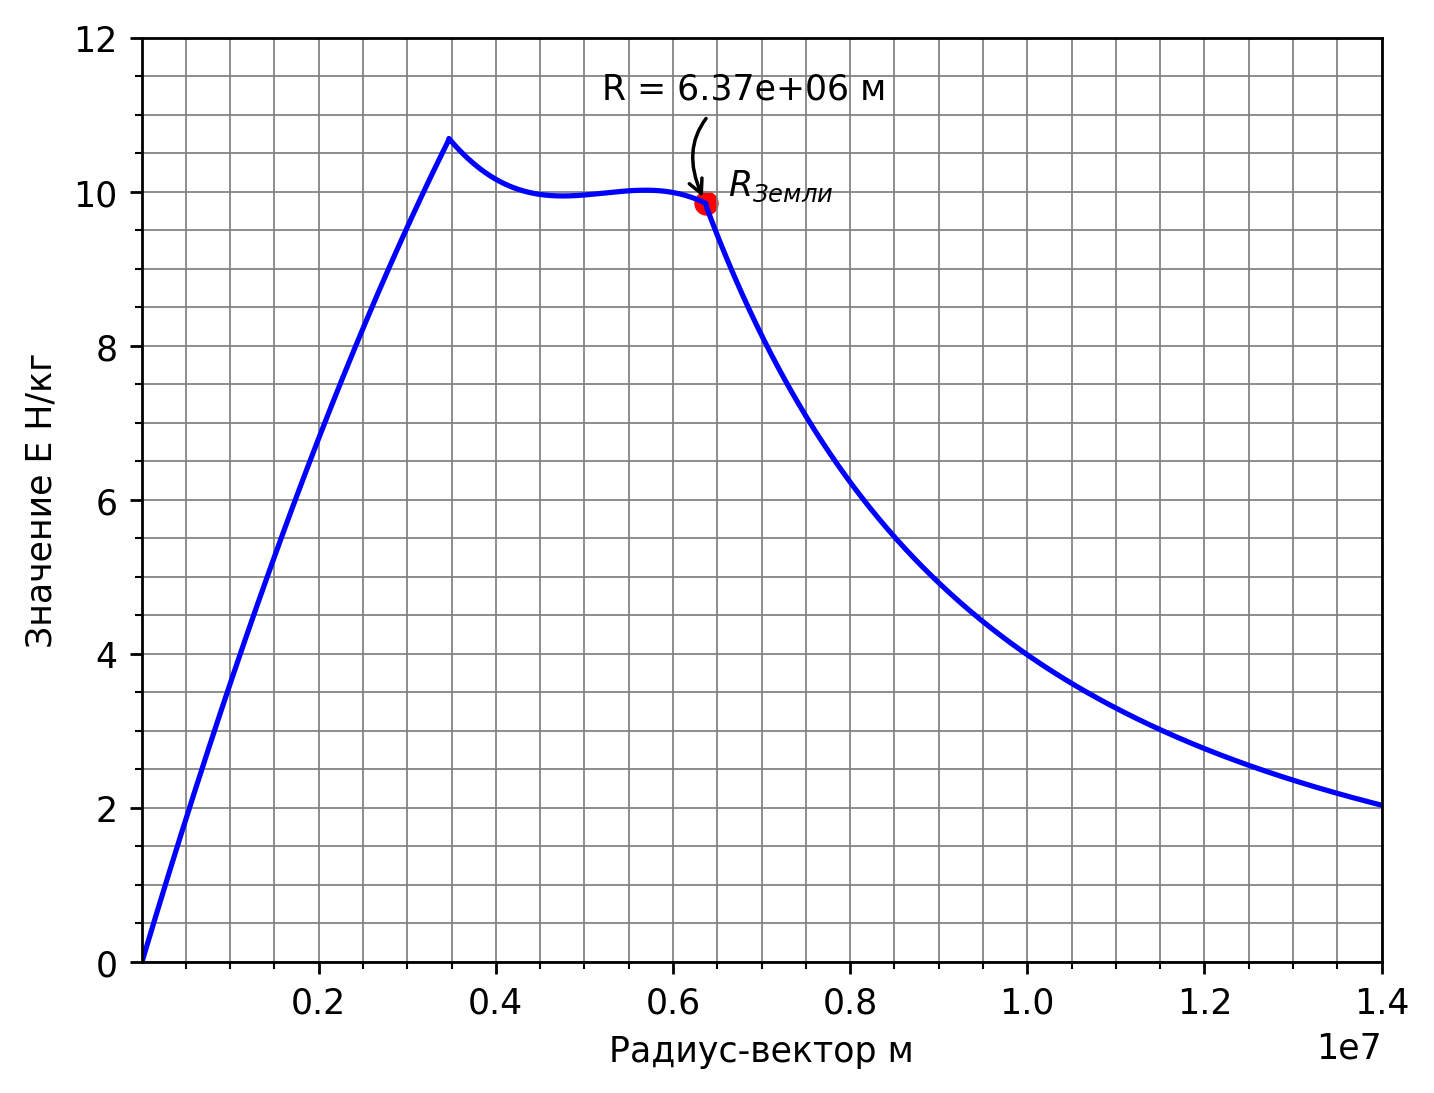

In [ ]:
# Настройки графика
int_start = 0.1
int_end = 7000000 * 2
step = 10000
y_max = 12

# Генерация данных для графика
x = np.arange(int_start, int_end, step)
y = np.where(x >= R_Earth, G * M / (x ** 2), vectorized_E(x))

# Построение графика
plt.figure(dpi=250)
plt.xlim(int_start, int_end)
plt.ylim(0, y_max)
plt.scatter(R_Earth, vectorized_E(R_Earth), color="r")
plt.text(R_Earth, vectorized_E(R_Earth), r"  $R_{Земли}$", ha="left", va="bottom")
plt.plot(x, y, color="blue")
plt.xlabel("Радиус-вектор м")
plt.ylabel("Значение E Н/кг")
plt.grid(True)
plt.minorticks_on()
plt.grid(which='both', linestyle='-', linewidth=0.5, color='grey')
plt.annotate(f'R = {R_Earth:.2e} м', (R_Earth, vectorized_E(R_Earth)), xytext=(-30, 30),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.show()

Напряженность гравитационного поля показывает, какое ускорение получит единица массы под действием гравитационного поля в данной точке. Радиус-вектор - это расстояние от центра Земли до точки, где вычисляется напряженность гравитационного поля.


Функция ```vec(x0, y0)``` вычисляет вектор напряженности гравитационного поля в точке $(x_0, y_0)$. Вектор напряженности гравитационного поля - это векторная величина, которая описывает взаимодействие тел в гравитационном поле. Она направлена от тела, создающего поле, к телу, на которое это поле действует, и ее величина обратно пропорциональна квадрату расстояния между телами. В данном случае, мы рассматриваем гравитационное поле Земли, поэтому вектор напряженности гравитационного поля направлен к центру Земли.

В функции ```vec(x0, y0)``` сначала вычисляется расстояние ```dist``` от точки $(x_0, y_0)$ до центра Земли. Если dist равно нулю (то есть, точка $(x_0, y_0)$ находится в центре Земли), то вектор напряженности гравитационного поля равен нулю. В противном случае вычисляется коэффициент $k$, который равен ```basearrowlen + (1 - basearrowlen) * E(dist) / E_max```. Здесь ```E(dist)``` - это напряженность гравитационного поля на расстоянии ```dist``` от центра Земли, а ```E_max``` - максимальное значение напряженности гравитационного поля. Коэффициент $k$ используется для нормализации длины вектора, чтобы его длина была пропорциональна напряженности гравитационного поля.

Затем вычисляются компоненты вектора $dx$ и $dy$. Они вычисляются как ```(-x0 / dist) * step * k``` и ```(-y0 / dist) * step * k``` соответственно. Здесь ```(-x0 / dist)``` и ```(-y0 / dist)``` - это косинусы углов между вектором напряженности гравитационного поля и осями $x$ и $y$ соответственно. Умножение на ```step * k``` обеспечивает корректную длину вектора.

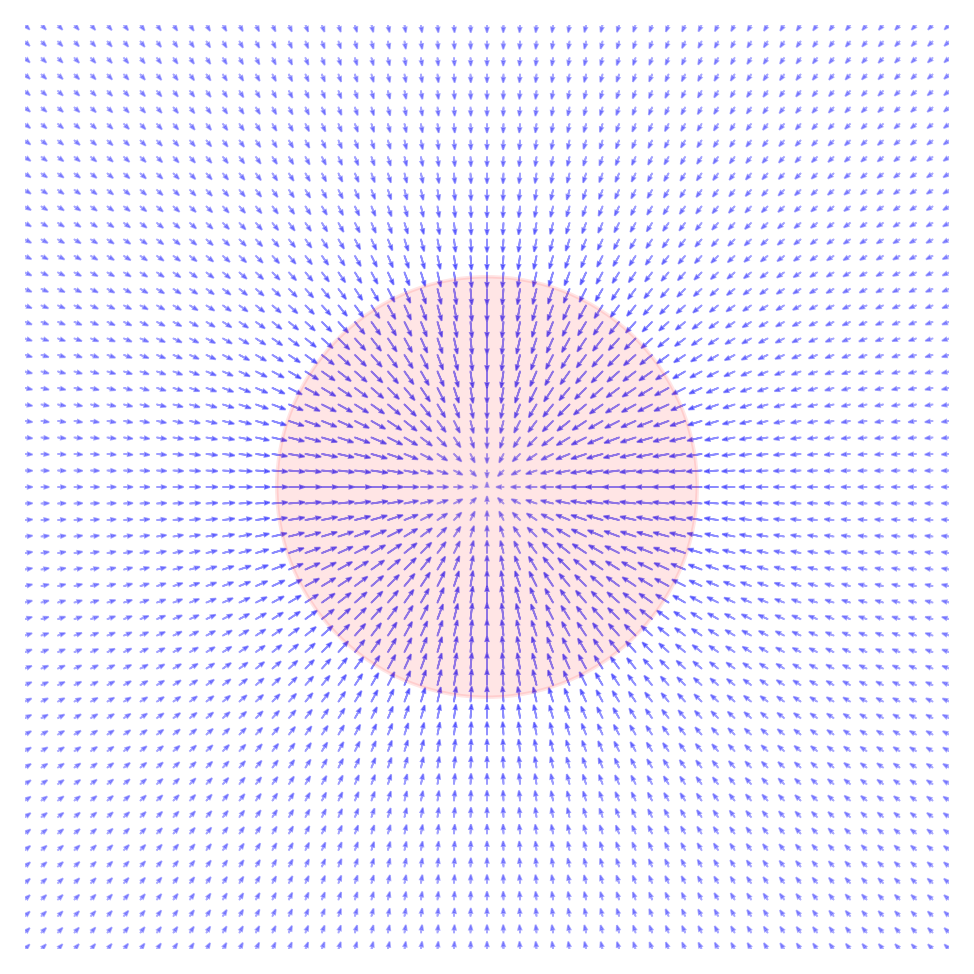

In [ ]:
# НАСТРОЙКИ ВЕКТОРНОГО ПОЛЯ
step = 500000
basearrowlen = 0.05
# Границы по осям, где (0,0) - центр земли
xlim = (-14000000, 14000000)
ylim = (-14000000, 14000000)

# ГЕНЕРАЦИЯ ВЕКТОРНОГО ПОЛЯ
plt.figure(dpi=250)
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])

# Вычисление максимальной напряженности для нормализации векторов
E_max = E(3470000)

# Функция для расчета векторов
def vec(x0, y0):
    dist = math.sqrt(x0 * x0 + y0 * y0)
    if dist == 0:
        return (0, 0)
    k = basearrowlen + (1 - basearrowlen) * E(dist) / E_max
    dx = (-x0 / dist) * step * k
    dy = (-y0 / dist) * step * k
    return (dx, dy)

# Нарисовать вектора
grid_x, grid_y = np.meshgrid(np.arange(xlim[0], xlim[1] + step, step), np.arange(ylim[0], ylim[1] + step, step))

for x, y in zip(grid_x.flatten(), grid_y.flatten()):
    dx, dy = vec(x, y)
    dx, dy = dx * 0.7, dy * 0.7
    alpha = 0.5 * (E(math.sqrt(x * x + y * y)) / E_max * 0.4 + 0.6)
    plt.arrow(x, y, dx, dy, color="blue", head_width=step // 5, linewidth=0.5, alpha=alpha)

# Показать радиус Земли, если выбранный радиус больше R_Earth
if (xlim[0] >= R_Earth or xlim[1] >= R_Earth or ylim[0] >= R_Earth or ylim[1] >= R_Earth):
    circ = plt.Circle((0, 0), R_Earth, color="r", alpha=0.1)
    plt.gca().add_patch(circ)

plt.gca().set_aspect(1)
plt.axis("off")
plt.show()